In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
#### 1. Prepare Data ####
### train set ###
data_train = pd.read_csv('ml_case_training_data.csv')
data_train        

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [16]:
data_hist = pd.read_csv('ml_case_training_hist_data.csv')

In [17]:
data_output = pd.read_csv('ml_case_training_output.csv')

In [18]:
avg_p2_var = data_hist['price_p2_var'].mean() 
avg_p2_var

0.0544116115133299

In [19]:
avg_p3_var = data_hist['price_p3_var'].mean()
avg_p3_var

0.030712264113950036

In [20]:
avg_p2_fix = data_hist['price_p2_fix'].mean()
avg_p2_fix

10.698200762762918

In [21]:
avg_p3_fix = data_hist['price_p3_fix'].mean()
avg_p3_fix

6.4554364825252994

In [22]:
avg_price_p1_var = data_hist.groupby('id').mean()['price_p1_var']

In [23]:
avg_price_p2_var = data_hist.groupby('id').mean()['price_p2_var']
avg_price_p2_var = avg_price_p2_var.replace(to_replace = 0, value = avg_p2_var )

In [24]:
avg_price_p3_var = data_hist.groupby('id').mean()['price_p3_var']
avg_price_p3_var = avg_price_p3_var.replace(to_replace = 0, value = avg_p3_var )

In [25]:
avg_price_p1_fix = data_hist.groupby('id').mean()['price_p1_fix']

In [26]:
avg_price_p2_fix = data_hist.groupby('id').mean()['price_p2_fix']
avg_price_p2_fix = avg_price_p2_fix.replace(to_replace = 0, value = avg_p2_fix )

In [27]:
avg_price_p3_fix = data_hist.groupby('id').mean()['price_p3_fix']
avg_price_p3_fix = avg_price_p3_fix.replace(to_replace = 0, value = avg_p3_fix )

In [115]:
all_data = pd.merge(data_output, avg_price_p1_var, left_on='id', right_on='id') 
all_data = pd.merge(all_data, avg_price_p2_var, left_on='id', right_on='id') 
all_data = pd.merge(all_data, avg_price_p3_var, left_on='id', right_on='id') 
all_data = pd.merge(all_data, avg_price_p1_fix, left_on='id', right_on='id') 
all_data = pd.merge(all_data, avg_price_p2_fix, left_on='id', right_on='id') 
all_data = pd.merge(all_data, avg_price_p3_fix, left_on='id', right_on='id') 
all_data = pd.merge(all_data, data_train, left_on='id', right_on='id') 
all_data
all_data.to_csv('all_data_train.csv')

In [119]:
### test set ###
# import data
data_test = pd.read_csv('ml_case_test_data.csv')
data_test_hist = pd.read_csv('ml_case_test_hist_data.csv')
data_test_output = pd.read_csv('ml_case_test_output_template.csv')
data_test_hist

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,3acc714fbd9b3ccaac3c412cf220e929,2015-01-01,0.168185,0.084213,0.000000,44.266931,0.00000,0.000000
1,3acc714fbd9b3ccaac3c412cf220e929,2015-02-01,0.168185,0.084213,0.000000,44.266931,0.00000,0.000000
2,3acc714fbd9b3ccaac3c412cf220e929,2015-03-01,0.168185,0.084213,0.000000,44.266931,0.00000,0.000000
3,3acc714fbd9b3ccaac3c412cf220e929,2015-04-01,0.168185,0.084213,0.000000,44.266931,0.00000,0.000000
4,3acc714fbd9b3ccaac3c412cf220e929,2015-05-01,0.168185,0.084213,0.000000,44.266930,0.00000,0.000000
...,...,...,...,...,...,...,...,...
48231,d0c4087eda93c5ceaa52de5aacd0d688,2015-08-01,0.115157,0.097472,0.071498,40.728885,24.43733,16.291555
48232,d0c4087eda93c5ceaa52de5aacd0d688,2015-09-01,0.115157,0.097472,0.071498,40.728885,24.43733,16.291555
48233,d0c4087eda93c5ceaa52de5aacd0d688,2015-10-01,0.115157,0.097472,0.071498,40.728885,24.43733,16.291555
48234,d0c4087eda93c5ceaa52de5aacd0d688,2015-11-01,0.115157,0.097472,0.071498,40.728885,24.43733,16.291555


In [120]:
test_avg_p2_var = data_test_hist['price_p2_var'].mean() 
test_avg_p2_var

0.054113414281096034

In [121]:
test_avg_p3_var = data_test_hist['price_p3_var'].mean()
test_avg_p3_var

0.030695429211205622

In [122]:
test_avg_p2_fix = data_test_hist['price_p2_fix'].mean()
test_avg_p2_fix

10.702319820822023

In [123]:
test_avg_p3_fix = data_test_hist['price_p3_fix'].mean()
test_avg_p3_fix

6.468525270248355

In [126]:
test_avg_price_p1_var = data_test_hist.groupby('id').mean()['price_p1_var']

In [129]:
test_avg_price_p2_var = data_test_hist.groupby('id').mean()['price_p2_var']
test_avg_price_p2_var = test_avg_price_p2_var.replace(to_replace = 0, value = test_avg_p2_var)
test_avg_price_p2_var

id
000381698491fec6983d55828fe5ada6    0.090583
000861c9aa2a0784b8d83f8b5b95d010    0.104134
0032d340d01dce810b28c3e2a5446fcc    0.103638
004a743cb630d0540d8016fc6c898786    0.054113
007d5d9fbd142235658fe836cfd338fa    0.102185
                                      ...   
ff7913c0763e7c5722be22986ab4720e    0.103794
ff8175f5cf7b92d07247c4d8190699cb    0.054113
ff86881921e7c28d3673fcd5a853d193    0.054113
ffd522dd7572b6a01c5b4c73b93edab8    0.085376
ffeba4728db570a69c39c53323a6a5b4    0.086711
Name: price_p2_var, Length: 4024, dtype: float64

In [130]:
test_avg_price_p3_var = data_test_hist.groupby('id').mean()['price_p3_var']
test_avg_price_p3_var = test_avg_price_p3_var.replace(to_replace = 0, value = test_avg_p3_var )
test_avg_price_p3_var

id
000381698491fec6983d55828fe5ada6    0.066138
000861c9aa2a0784b8d83f8b5b95d010    0.075021
0032d340d01dce810b28c3e2a5446fcc    0.072865
004a743cb630d0540d8016fc6c898786    0.030695
007d5d9fbd142235658fe836cfd338fa    0.072778
                                      ...   
ff7913c0763e7c5722be22986ab4720e    0.073160
ff8175f5cf7b92d07247c4d8190699cb    0.030695
ff86881921e7c28d3673fcd5a853d193    0.030695
ffd522dd7572b6a01c5b4c73b93edab8    0.030695
ffeba4728db570a69c39c53323a6a5b4    0.030695
Name: price_p3_var, Length: 4024, dtype: float64

In [131]:
test_avg_price_p1_fix = data_test_hist.groupby('id').mean()['price_p1_fix']

In [132]:
test_avg_price_p2_fix = data_test_hist.groupby('id').mean()['price_p2_fix']
test_avg_price_p2_fix = test_avg_price_p2_fix.replace(to_replace = 0, value = test_avg_p2_fix )

In [133]:
test_avg_price_p3_fix = data_test_hist.groupby('id').mean()['price_p3_fix']
test_avg_price_p3_fix = test_avg_price_p3_fix.replace(to_replace = 0, value = test_avg_p3_fix )

In [134]:
test_all_data = pd.merge(data_test_output, test_avg_price_p1_var, left_on='id', right_on='id') 
test_all_data = pd.merge(test_all_data, test_avg_price_p2_var, left_on='id', right_on='id') 
test_all_data = pd.merge(test_all_data, test_avg_price_p3_var, left_on='id', right_on='id') 
test_all_data = pd.merge(test_all_data, test_avg_price_p1_fix, left_on='id', right_on='id') 
test_all_data = pd.merge(test_all_data, test_avg_price_p2_fix, left_on='id', right_on='id') 
test_all_data = pd.merge(test_all_data, test_avg_price_p3_fix, left_on='id', right_on='id') 
test_all_data = pd.merge(test_all_data, data_test, left_on='id', right_on='id') 
all_data
#test_all_data.to_csv('test_all_data_train.csv')

,id,churn,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,activity_new,campaign_disc_ele,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,1,0.122856,0.102137,0.072579,40.640023,24.384011,16.256008,NaN,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,0,0.149934,0.054412,0.030712,44.315416,10.698201,6.455436,NaN,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,0,0.170512,0.088421,0.030712,44.385450,10.698201,6.455436,NaN,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,0,0.151210,0.054412,0.030712,44.400265,10.698201,6.455436,NaN,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,0,0.144124,0.054412,0.030712,44.370635,10.698201,6.455436,NaN,NaN,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,1,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,NaN,NaN,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,NaN,NaN,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,0,0.149934,0.054412,0.030712,44.315416,10.698201,6.455436,NaN,NaN,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


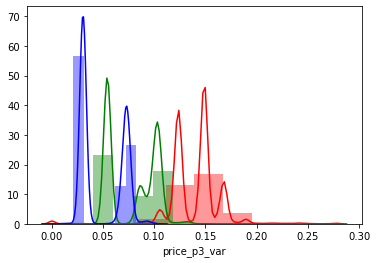

In [80]:
#### 2.Data Visualization ####

### histogram ###
## Price Var ##
price_var = all_data.iloc[0: , 2:5]
sns.set_palette("hls")
x1 = price_var['price_p1_var']
sns.distplot(x1,color="r",bins=10,kde=True)
x2 = price_var['price_p2_var']
sns.distplot(x2,color="g",bins=10,kde=True)
x3 = price_var['price_p3_var']
sns.distplot(x3,color="b",bins=10,kde=True)

/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

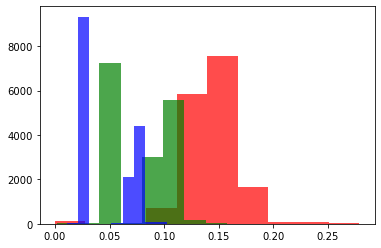

In [70]:
plt.figure()
hist_price_p1_var = plt.hist(x1, bins=10, histtype="stepfilled", color="r",alpha=.7)
hist_price_p2_var = plt.hist(x2, bins=10, histtype="stepfilled", color="g",alpha=.7)
hist_price_p3_var = plt.hist(x3, bins=10, histtype="stepfilled", color="b",alpha=.7)

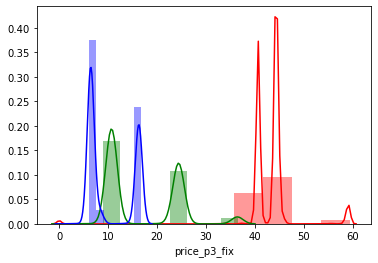

In [71]:
## Price Fix ##
price_fix = all_data.iloc[0: , 5:8]
sns.set_palette("hls")
x4 = price_fix['price_p1_fix']
sns.distplot(x4,color="r",bins=10,kde=True)
x5 = price_fix['price_p2_fix']
sns.distplot(x5,color="g",bins=10,kde=True)
x6 = price_fix['price_p3_fix']
sns.distplot(x6,color="b",bins=10,kde=True)

/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/a1/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

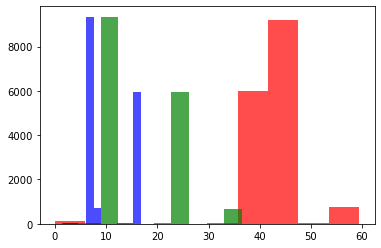

In [72]:
plt.figure()
hist_price_p1_fix = plt.hist(x4, bins=10,histtype="stepfilled", color="r",alpha=.7)
hist_price_p2_fix = plt.hist(x5, bins=10,histtype="stepfilled", color="g",alpha=.7)
hist_price_p3_fix = plt.hist(x6, bins=10,histtype="stepfilled", color="b",alpha=.7)